In [1]:
from source.regency import Regency
from source.mapping import Mapping
from source.DQNAgent import DQNAgent
from IPython.display import clear_output
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


seasons = 1
Game = Regency(True)
clear_output()

for a in range(seasons):
    print(a)
    Game.random_events()
    Game.collect_regency_points()
    Game.domain_initiative()
    Game.collect_gold_bars()
    Game.maintenance_costs(Update=True)
    Game.Seasons[Game.Season]['Season']
    Game.take_domain_actions()
    Game.war_move()
    Game.clean_up()
    Game.clear_screen()

df = pd.concat([Game.Seasons[b]['Actions'][a+1] for a in range(3) for b in range(seasons)])
print(set(df['Action']))
print()
print(set(df[df['Success?']==True]['Action']))
Game.War

{'muster_mercenaries', 'adventuring', 'realm_magic_demagogue_enemy', 'create_holding', 'investure_invest_friend', 'diplomacy_trade_agreement', 'investiture_become_vassal_friend', 'contest_holding', 'decree_general', 'declare_war', 'agitiate_for_friend', 'decree_asset_seizure', 'grant', 'realm_magic_alchemy', 'diplomacy_troop_permission', 'espionage_corruption', 'muster_army', 'diplomacy_respond_to_brigandage', 'investure_divest_enemy', 'espionage_heresy', 'espionage_assassination', 'espionage_discover_troop_movements', 'realm_magic_bless_land'}

{'grant', 'diplomacy_trade_agreement', 'realm_magic_alchemy', 'investiture_become_vassal_friend', 'muster_mercenaries', 'contest_holding', 'decree_general', 'adventuring', 'create_holding', 'investure_invest_friend', 'declare_war', 'agitiate_for_friend', 'decree_asset_seizure', 'realm_magic_bless_land'}


,Year,Location,Event,Notes


In [2]:
df[df['Regent']=='Is']

,Regent,Actor,Action Type,Action,Decision,Target Regent,Provence,Target Provence,Target Holding,Success?,Base Reward,State,Invalid,Message
4,Is,Emerald Queen Isaelie,Action,adventuring,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",,,,,True,4,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",False,Emerald Queen Isaelie went adventuring.
3,Is,Emerald Queen Isaelie,Guild,create_holding,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CJS,Fhylallien,,Guild,True,-4,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",False,Established a Guild Holding in Fhylallien
5,Is,Emerald Queen Isaelie,Action,diplomacy_trade_agreement,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",AV,,,,False,0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",False,"10 Emerald Queen Isaelie\nName: Full Name, ..."


In [3]:
Game.Regents

,Regent,Full Name,Bloodline,Culture,Player,Class,Level,Alignment,Race,Str,...,Insight,Deception,Persuasion,Regency Points,Gold Bars,Regency Bonus,Attitude,Alive,Divine,Arcane
0,EC,Eluvie Cariele,Ma,A,False,Noble,2,CG,Human,0,...,4,5,5,20,11,2,Peaceful,True,False,False
1,LPA,Life and Protection of Avanalae (Medhlorie Hae...,An,A,False,Priest,5,NN,Human,0,...,1,1,3,8,3,3,Normal,True,True,False
2,Sw2,Second Swamp Mage,Vo,A,False,Mage,9,NG,Human,-1,...,3,0,0,21,-1,-1,Normal,True,False,True
3,DW,Diirk Watersold (Royal Guild of Baruk-Azhir),An,D,False,Bandit Captain,10,NG,Dwarf,2,...,2,4,2,57,14,1,Normal,True,False,False
4,TBM,Three Brother Mages,Vo,A,False,Mage,9,NN,Human,-1,...,3,0,0,9,0,1,Normal,True,False,True
5,MF,Moradin's Forge (Ruarch Rockhammer),An,D,False,Cult Fanatic,6,LG,Dwarf,0,...,1,4,4,54,17,1,Normal,True,True,False
6,JR,Jaison Raenech,Br,A,False,Knight,8,LE,Human,3,...,0,2,2,12,0,3,Aggressive,True,False,False
7,WM,Willaim Moergen,An,A,False,Noble,2,CG,Human,0,...,4,5,5,2,0,3,Normal,True,False,False
8,GG,Overthane Grimm Graybeard,An,D,False,Fighter/Cleric,2,LG,Dwarf,4,...,4,5,5,46,23,3,Peaceful,True,True,False
9,Ch,The Chimera,,A,False,Archmage,18,CE,Elf,0,...,5,3,3,19,-1,5,Aggressive,True,False,True


In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


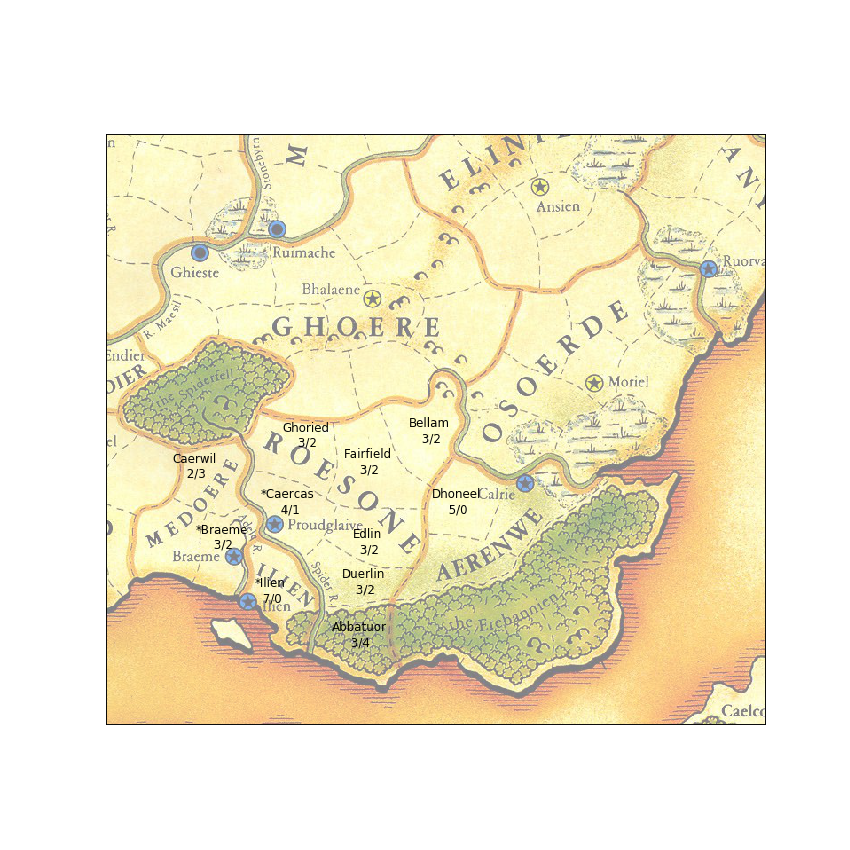

In [5]:

Map = Mapping(Game)
Map.focus_regents(['MR'])
Map.show(show_troops=True, caravans=False)

In [6]:
Game.Espionage

,Regent,Target,Assassination,Diplomacy,Troop Movements,Other


In [7]:
Game.Regents[Game.Regents['Divine']=='True']

,Regent,Full Name,Bloodline,Culture,Player,Class,Level,Alignment,Race,Str,...,Insight,Deception,Persuasion,Regency Points,Gold Bars,Regency Bonus,Attitude,Alive,Divine,Arcane


In [8]:
Game.errors

[]

In [9]:
dff = Game.failed_actions
dff.head()

""
